# Lineare Modelle

In dieser Übung werden wir die linearen Modelle, die in den Vorlesungsfolien vorkommen, selbst implementieren.
Wir starten mit den Iris-Daten, die Sie schon aus der Vorlesung kennen.

In [1]:
import pandas as pd

df = pd.read_csv("iris.csv", index_col=0)
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Wie in der Vorlesung können wir die Daten plotten.

In [2]:
#plot iris 

import matplotlib.pyplot as plt

dfs = df.loc[df.Name != "Iris-setosa",:]
#print(dfs)

plt.plot(dfs.loc[:,"SepalWidth"],dfs.loc[:,"PetalLength"],'o')

Zunächst schauen wir uns das einfache lineare Modell an, das den Zusammenhang zwischen PetalLength und SepalWidth darstellt. Wir werden für das Fitten von linearen Modellen das Python-Paket statsmodels verwenden (`https://www.statsmodels.org`). Die Spezifikation von linearen Modellen funktioniert hier ganz ähnlich wie in den R-Beispielen, die in der Vorlesung vorkommen.

Um die `ols` Formeln besser zu verstehen, lohnt sich ein Blick hier: (https://patsy.readthedocs.io/en/latest/formulas.html)

In [3]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = smf.ols('PetalLength ~ SepalWidth', data=dfs).fit()
#?smf.ols
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PetalLength   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     36.28
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           2.99e-08
Time:                        13:04:22   Log-Likelihood:                -106.48
No. Observations:                 100   AIC:                             217.0
Df Residuals:                      98   BIC:                             222.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2021      0.619      1.942      0.055      -0.026       2.430
SepalWidth     1.2897      0.214      6.023      0.000       0.865       1.715
==============================================================================
Omnibus:                        6.767   Durbin-Watson:                   0.895
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                6.222
Skew:                           0.575   Prob(JB):                       0.0446
Kurtosis:                       3.414   Cond. No.                         28.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Aufgabe*: Interpretieren Sie die Ergebnisse! Was bedeuten die Koeffizienten, $R^2$, p-Werte?

Intercept = Wert, an dem Regressions-Linie die y-Achse schneidet (expected mean value of Y when all X=0)

$R^2$ Werte: percentage variation in dependent that is explained by independent variables 

p-Wert: Signifikanz der Regression

(https://jyotiyadav99111.medium.com/statistics-how-should-i-interpret-results-of-ols-3bde1ebeec01)




## Regularisierung

Betrachten Sie nun den stark korrelierten Datensatz von Seite 23 des Foliensatzes `Linear Models`.

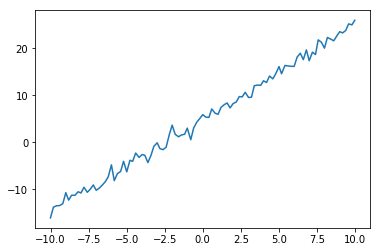

In [4]:
df = pd.read_csv("corr_data.csv")
#print(df)
plt.plot(df.loc[:,"x1"],df.loc[:,"y"])

*Aufgabe*: Fitten Sie ein lineares Modell mit y als abhängiger Variablen und x1 und x2 als unabhängigen Variablen. Interpretieren Sie erneut die Ergebnisse. Was ist das Problem?

In [5]:
results = smf.ols('y ~ x1 + x2', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     7531.
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          5.19e-108
Time:                        13:04:22   Log-Likelihood:                -136.69
No. Observations:                 101   AIC:                             279.4
Df Residuals:                      98   BIC:                             287.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9804      0.095     52.277      0.000       4.791       5.169
x1            -5.8432      7.006     -0.834      0.406     -19.746       8.059
x2             7.8352      7.006      1.118      0.266      -6.069      21.739
==============================================================================
Omnibus:                        1.274   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.529   Jarque-Bera (JB):                0.769
Skew:                          -0.015   Prob(JB):                        0.681
Kurtosis:                       3.426   Cond. No.                         864.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P-Werte der Koeffizienten sehr hoch, gesamter P-Wert sehr gering, Standardabweichung der Koeffizienten sehr hoch

*Aufgabe*: Verwenden Sie Ridge Regression, um ein lineares Modell zu fitten.

In [6]:
model = smf.ols('y ~ x1 + x2', data=df)
results = model.fit_regularized(L1_wt=0.1,alpha=0.01)
results.params #parameters for intercept, x1, x2: what we expect

Intercept    4.922549
x1           1.963074
x2           0.027962
dtype: float64

# Logistische Regression mit sklearn

Im Machine Learning sind wir oft gar nicht so sehr an den Parametern des Modells interessiert, sondern daran, dass das Modell gute Vorhersagen liefert. Für solche Zwecke ist die logistische Regression aus dem Paket `sklearn` besser geeignet -- dort werden Dinge, die in statsmodels recht mühsam sind, wie das Encoding der Klasse, der Umgang mit mehr als zwei Klassen usw. direkt erledigt. Schauen Sie sich dafür die folgende Dokumentation an: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Teilen Sie den Iris-Datensatz in zwei Teilmengen auf: Eine Trainingsmenge, die 80% der Daten enthält, und eine Testmenge, die die restlichen 20% der Daten enthält. Trainieren Sie dann ein Logit-Modell mit den Trainingsdaten und erzeugen Sie eine Vorhersage für die Klasse der Testdaten. Welcher Anteil der Testdaten wurde korrekt klassifiziert?

In [7]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

clf = LogisticRegression().fit(X_train, y_train)
yhat = clf.predict(X_test)
np.mean(yhat == y_test)

1.0